# 1. Import libraries, preview data and display df summary

<p>Your task is to import the Pandas and Numpy libraries. Following this, execute the code to load the 'weekly_customer_complaints.csv' file into a pandas DataFrame, called df, view the first five records to ensure successful data loading, and obtain a summary of the DataFrame to inspect its structure.</p>

In [1]:
# First, import the Numpy and Pandas libraries.

# Import necessary libraries 
import numpy as np 
import pandas as pd

In [2]:
"""
Next, load the data from 'weekly_customer_complaints.csv' into a DataFrame named df 
and ensure the index column is read as a date.  Display the first five records from the DataFrame 
to verify the data has been loaded correctly.
"""
# Load the data from 'weekly_customer_complaints.csv' into a DataFrame
df = pd.read_csv('weekly_customer_complaints.csv', index_col=0, parse_dates=True)
 
# Display the first five records to verify successful data loading
df.head()


,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [3]:
# Finally, obtain a summary of the DataFrame to review its structure.

# Obtain and display a summary of the DataFrame to inspect its structure
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaints               261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


# 2. Adjust DataFrame Index Frequency to Weekly

<p>Examine the current frequency of the DataFrame index and alter it to a weekly frequency, specifically to every Monday. Subsequent to this modification, preview the first five records to ensure the adjustment has been carried out accurately.</p>

In [4]:
# Inspect the current index frequency of the DataFrame.

# Check the frequency of the index
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq=None)

In [5]:
# Alter the DataFrame index frequency to a weekly interval, with the week starting every Monday.

# Changing time frequency to weekly, starting on Mondays
df = df.asfreq("W-Mon")

In [6]:
# Preview the first five records to verify the changes.

# Display the index to verify the frequency adjustment
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

# 3. Clean and Prepare Data for Analysis

<p>Your task involves three steps: firstly, remove any commas from the 'complaints' column and convert this column to a float data type; secondly, remove the percentage sign from the 'discount_rate' column and convert this to a float while maintaining its proportion (i.e., a 20% should become 0.20); lastly, segregate the DataFrame into target (<code><strong>y</strong></code>) and feature set (<code><strong>X</strong></code>) where <code><strong>y</strong></code> should have the 'complaints' column and <code><strong>X</strong></code> should have all other columns.</p>

In [7]:
# Remove commas from the 'complaints' column and convert the data type to float.

# Remove commas from the 'complaints' column and convert to float
df['complaints'] = df['complaints'].str.replace(',', '').astype(float)

In [8]:
"""
Eliminate the percentage symbol from the 'discount_rate' column, 
convert the data type to float, and scale down by a factor of 100.
"""
# Remove the "%" sign from the 'discount_rate' column, convert to float and divide by 100
df['discount_rate'] = df['discount_rate'].str.rstrip('%').astype('float') / 100

In [9]:
# Preview the DataFrame to verify the changes (optional).

# Display the first five records to verify the changes
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,0.3726,1,0,0
2018-01-08,1701.0,0.3538,0,0,0
2018-01-15,1711.0,0.3622,1,0,0
2018-01-22,1443.0,0.3833,1,0,0
2018-01-29,1397.0,0.3634,0,0,0


In [10]:
# Isolate the target variable 'complaints' as y and all other columns as feature set X.

# Isolate target variable 'complaints' and feature set
y = df['complaints']
X = df.iloc[:,1:]

# 4. Visualize Customer Complaints Over Time

<p>You are required to generate a line plot to visualize the trend of customer complaints over time. Initially, create a simple line plot, then enhance the plot by adding markers, modifying line style, adding titles, labels, and grid for better interpretability.</p>

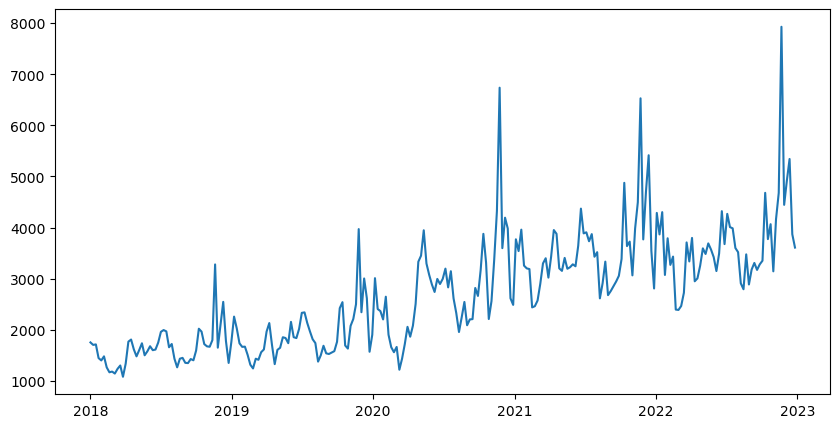

In [11]:
# Import Matplotlib and generate a simple line plot.

import matplotlib.pyplot as plt
 
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['complaints'])
plt.show()


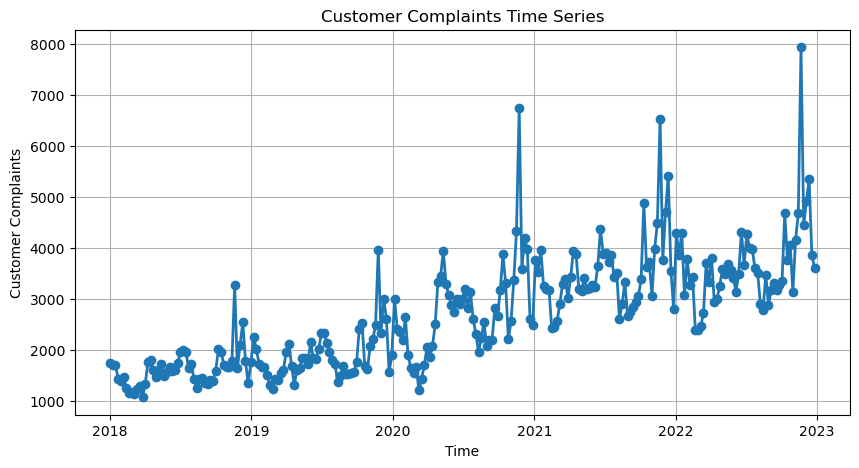

In [12]:
# Enhance the plot for better interpretability.

# Customize the Plot
plt.figure(figsize=(10, 5))
plt.plot(df.index,
         df['complaints'],
         marker='o',          # Adding markers
         linestyle='-',       # Defining line style
         linewidth=2)         # Defining line width
plt.title('Customer Complaints Time Series')  # Adding title
plt.xlabel('Time')                           # Adding x-axis label
plt.ylabel('Customer Complaints')            # Adding y-axis label
plt.grid(True)                               # Displaying grid
plt.show()

# 5. Decompose Time Series into Trend, Seasonal, and Residual Components

<p>Your task is to decompose the time series data of customer complaints into its trend, seasonal, and residual components. Utilize the <code><strong>seasonal_decompose</strong></code> function from the <code><strong>statsmodels</strong></code> library. Subsequently, visualize the decomposed components using a plot.</p>

In [13]:
# Import the necessary function for decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
# Perform seasonal decomposition on the target series:

# Execute seasonal decomposition to isolate trend, seasonal, and residual components
decomposition = seasonal_decompose(y, # The time series data
                                   model='additive', # Specifying the model as additive or multiplicative
                                   period=52 # Setting the period to 52 weeks for weekly data
                                  )

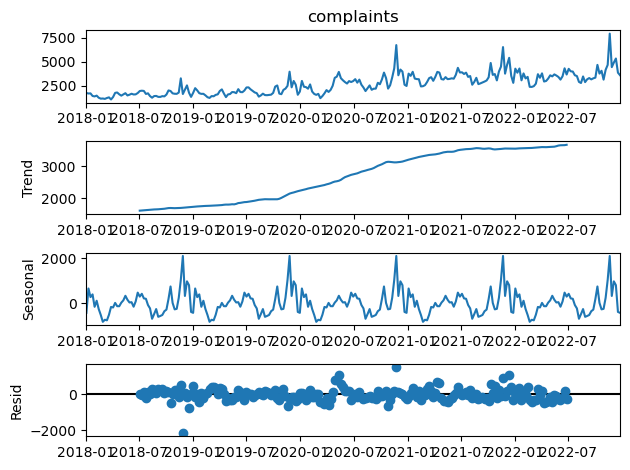

In [15]:
# Visualize the decomposed components:

# Plotting the trend, seasonal, and residual components
decomposition.plot()
plt.show()  # Display the plot

# 6. Generate Autocorrelation Plot for Customer Complaints Data

<p>Your task is to generate an autocorrelation plot for the customer complaints data available in the DataFrame <code><strong>df</strong></code>. This plot will help in understanding the correlation of the data with its lagged version. Customize the xlabel, ylabel and title of the plot.</p>

In [16]:
# Import the necessary function:

# Import the autocorrelation_plot function from pandas.plotting
from pandas.plotting import autocorrelation_plot

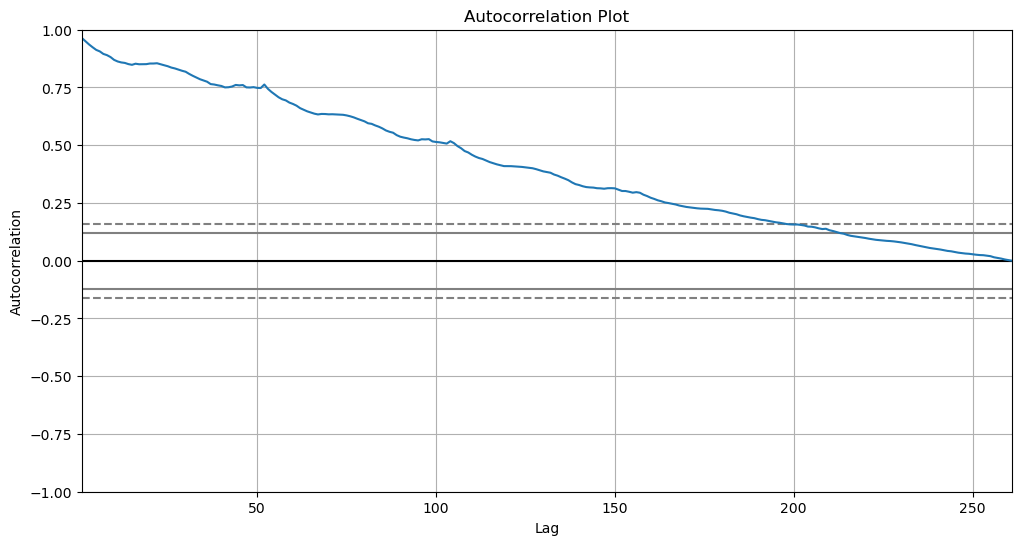

In [17]:
"""
Initialize a figure for the plot. Generate and display the autocorrelation plot, 
customizing the label, ylabel, and title.
"""

# Create a figure to host the autocorrelation plot
plt.figure(figsize=(12, 6))
 
# Generate the autocorrelation plot for the DataFrame df
autocorrelation_plot(df)
 
# Labeling the axes and giving a title to the plot
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
 
# Display the plot
plt.show()

# 7. Implement and Evaluate ARIMA Model for Customer Complaints Forecasting

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Apply the ARIMA (AutoRegressive Integrated Moving Average) model utilizing the pmdarima library for forecasting customer complaints. The model should be structured with particular order and seasonal order parameters. Additionally, perform a cross-validation check using a rolling forecast cross-validation to evaluate the model's robustness. Ensure to assess the model's performance by calculating the Root Mean Squared Error (RMSE) from the cross-validation scores. Please note that the cross-validation will take 10 minutes.</p><p><strong>Parameters for Functions:</strong></p><ul><li><p>ARIMA Model:</p><ul><li><p>order: (1, 0, 1)</p></li><li><p>seasonal_order: (1, 0, 0, 52)</p></li></ul></li><li><p>RollingForecastCV:</p><ul><li><p>h: 26</p></li><li><p>step: 8</p></li><li><p>initial: 210</p></li></ul></li><li><p>cross_val_score:</p><ul><li><p>scoring: 'mean_squared_error'</p></li><li><p>verbose: 5</p></li><li><p>error_score: 1000000000000000</p></li></ul></li></ul></div>

In [19]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.6/628.6 kB 6.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.7 MB/s eta 0:00:00a 0:00:01


In [20]:
# Import necessary libraries and modules for model implementation.

import pmdarima as pm
from pmdarima import model_selection

In [21]:
# Configure the ARIMA model with the specified order and seasonal order parameters.

# Initializing the ARIMA model with the given parameters
model = pm.ARIMA(order=(1, 0, 1),
                 seasonal_order=(1, 0, 0, 52))

In [22]:
# Retrieve and display the total number of weeks present in the data for reference.

# Fetching the number of weeks in the dataset to understand the data size
weeks_in_data = X.shape[0]
print(f'Total Weeks in Data: {weeks_in_data}')


Total Weeks in Data: 261


In [23]:
# Set up a rolling forecast cross-validation strategy with defined horizon, step, and initial size.

# Establishing the cross-validation strategy for model evaluation
cv = model_selection.RollingForecastCV(h=26, 
                                       step=8, 
                                       initial=210)

In [24]:
# Execute cross-validation on the ARIMA model to evaluate its performance on unseen data.

# Conducting cross-validation to obtain performance metrics
cv_score = model_selection.cross_val_score(model,
                                           y=y,
                                           X = X,
                                           scoring='mean_squared_error',
                                           cv=cv,
                                           verbose=5,
                                           error_score=1000000000000000)


[CV] fold=0 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=0, score=140943.079 [time=6.892 sec]
[CV] fold=1 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=1, score=165909.187 [time=7.606 sec]
[CV] fold=2 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=2, score=164013.248 [time=7.290 sec]
[CV] fold=3 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=3, score=405979.077 [time=8.961 sec]


In [25]:
"""
Calculate the Root Mean Squared Error (RMSE) from cross-validation scores 
to assess the model's forecasting accuracy.
"""

# Computing the RMSE from cross-validation scores for a comprehensive performance evaluation
error = np.sqrt(np.average(cv_score))
print(f'Root Mean Squared Error: {error}')

Root Mean Squared Error: 468.19990136538814


# 8. Parameter Tuning for ARIMA Model in Customer Complaints Forecasting

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Your task is to perform a parameter tuning for an ARIMA model to find the optimal parameters for forecasting customer complaints. Use a grid search approach over a defined parameter grid to evaluate different model configurations. For each combination of parameters, fit an ARIMA model, perform rolling forecast cross-validation, compute the Root Mean Squared Error (RMSE), and collect these errors for analysis. Ensure the cross-validation method uses a rolling forecast approach.</p><p><strong>Parameters for Functions:</strong></p><ul><li><p>Tuning possibilities :</p><ul><li><p>p: 0 or 1</p></li><li><p>d:&nbsp;1</p></li><li><p>q: 0 or 1</p></li><li><p>P: 1</p></li><li><p>D:&nbsp;0</p></li><li><p>Q:&nbsp;0 or 1</p></li></ul></li><li><p>ARIMA Model:</p><ul><li><p>order: Tuple containing the values of (p, d, q).</p></li><li><p>seasonal_order: Tuple containing the values of (P, D, Q, 52).</p></li></ul></li><li><p>RollingForecastCV:</p><ul><li><p>h: 26</p></li><li><p>step: 8</p></li><li><p>initial: 210</p></li></ul></li><li><p>cross_val_score:</p><ul><li><p>scoring: 'mean_squared_error'.</p></li><li><p>verbose: 5</p></li><li><p>error_score: 1000000000000000</p></li></ul></li></ul><p>Please note that this task can take one hour to complete.</p></div>

In [26]:
# Import the necessary module for parameter grid creation:

from sklearn.model_selection import ParameterGrid

In [27]:
# Define the parameter grid for the ARIMA model tuning:

# Defining the range of values for each parameter for grid search
param_grid = {'p': [0,1],
              'd': [1],
              'q': [0,1],
              'P': [1],
              'D': [0],
              'Q': [0,1]}
grid = ParameterGrid(param_grid)

In [28]:
# Display the total number of parameter combinations to be evaluated:

# Checking the total number of parameter combinations
print(f'Total Parameter Combinations: {len(list(grid))}')

Total Parameter Combinations: 8


In [29]:
# Initialize an empty list to collect RMSE values and a counter for iteration tracking:

rmse = []
i = 1

In [30]:
# Iterate over each parameter combination in the grid, configuring, and evaluating an ARIMA model:

# Looping through each parameter combination for model evaluation
for params in grid:
    print(f" {i} / {len(list(grid))}")
    
    # Configuring the ARIMA model with the current parameter combination
    model = pm.ARIMA(order=(params['p'], params['d'], params['q']),
                     seasonal_order=(params['P'], params['D'], params['Q'], 52))
    
    # Setting up the rolling forecast cross-validation strategy
    cv = model_selection.RollingForecastCV(h=26, 
                                           step=8, 
                                           initial=210)
    
    # Executing cross-validation to obtain the mean squared error
    cv_score = model_selection.cross_val_score(model,
                                               y=y,
                                               X = X,
                                               scoring='mean_squared_error',
                                               cv=cv,
                                               verbose=5,
                                               error_score=1000000000000000)
    
    # Computing the RMSE from the cross-validation scores for the current parameter combination
    error = np.sqrt(np.average(cv_score))
    rmse.append(error)
    
    i += 1  # Updating the iteration counter


 1 / 8
[CV] fold=0 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=0, score=264300.874 [time=5.054 sec]
[CV] fold=1 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=1, score=299842.683 [time=6.636 sec]
[CV] fold=2 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=2, score=85206.220 [time=6.238 sec]
[CV] fold=3 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=3, score=305707.267 [time=5.490 sec]
 2 / 8
[CV] fold=0 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=0, score=229521.543 [time=5.648 sec]
[CV] fold=1 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=1, score=278955.428 [time=6.135 sec]
[CV] fold=2 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=2, score=163050.626 [time=5.707 sec]
[CV] fold=3 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=3, score=275552.026 [time=5.866 sec]
 3 / 8
[CV] fold=0 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=0, score=191902.620 [time=5.595 sec]
[CV] fold=1 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=1, score=299347.847 [time=5.252 sec]
[CV] fold=2 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=2, score=145731.255 [time=5.498 sec]
[CV] fold=3 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=3, score=275904.699 [time=5.818 sec]
 4 / 8
[CV] fold=0 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=0, score=344288.793 [time=6.541 sec]
[CV] fold=1 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=1, score=174648.215 [time=6.768 sec]
[CV] fold=2 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=2, score=118472.859 [time=7.086 sec]
[CV] fold=3 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=3, score=285139.597 [time=7.675 sec]
 5 / 8
[CV] fold=0 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=0, score=229064.646 [time=5.242 sec]
[CV] fold=1 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=1, score=198968.333 [time=6.648 sec]
[CV] fold=2 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=2, score=140841.912 [time=6.582 sec]
[CV] fold=3 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=3, score=272550.997 [time=6.100 sec]
 6 / 8
[CV] fold=0 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=0, score=260068.052 [time=7.015 sec]
[CV] fold=1 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=1, score=207119.749 [time=7.441 sec]
[CV] fold=2 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=2, score=182878.175 [time=8.237 sec]
[CV] fold=3 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=3, score=248610.871 [time=7.717 sec]
 7 / 8
[CV] fold=0 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=0, score=188307.700 [time=6.288 sec]
[CV] fold=1 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=1, score=340039.645 [time=7.217 sec]
[CV] fold=2 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=2, score=163066.126 [time=6.677 sec]
[CV] fold=3 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=3, score=235796.912 [time=7.373 sec]
 8 / 8
[CV] fold=0 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=0, score=320020.138 [time=8.639 sec]
[CV] fold=1 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=1, score=101067.585 [time=10.232 sec]
[CV] fold=2 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=2, score=122386.212 [time=9.929 sec]
[CV] fold=3 ..........................................................


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fold=3, score=263581.401 [time=7.984 sec]


# 9. Evaluating Tuning Results and Identifying Optimal Parameters for ARIMA Model

<p>After performing the parameter tuning, your task now is to evaluate the tuning results to find the best parameters that minimize the Root Mean Squared Error (RMSE) for forecasting customer complaints. Create a DataFrame to store the parameters and corresponding RMSE values, and then identify and print the best parameters that yield the lowest RMSE.</p>

In [31]:
# Construct a DataFrame to house the parameter combinations and corresponding RMSE values.

# Creating a DataFrame to store the parameter combinations and their corresponding RMSE values
tuning_results = pd.DataFrame(list(grid), columns=param_grid.keys())
tuning_results['rmse'] = rmse

In [32]:
# Display the tuning results for review.

# Displaying the tuning results to review the RMSE values against each parameter combination
print(tuning_results)

   p  d  q  P  D  Q        rmse
0  0  1  0  1  0  0  488.635100
1  0  1  1  1  0  0  486.590080
2  1  1  0  1  0  0  477.725450
3  1  1  1  1  0  0  480.247193
4  0  1  0  1  0  1  458.646347
5  0  1  1  1  0  1  473.992839
6  1  1  0  1  0  1  481.458821
7  1  1  1  1  0  1  449.181293


In [33]:
# Identify the best parameters that yield the lowest RMSE value.

# Identifying the parameter combination that yields the lowest RMSE value
best_params = tuning_results[tuning_results.rmse == tuning_results.rmse.min()]


In [34]:
# Display the best parameters.

# Displaying the best parameters for review
print(best_params)

   p  d  q  P  D  Q        rmse
7  1  1  1  1  0  1  449.181293


# 10. Evaluating Tuning Results and Identifying Optimal Parameters for ARIMA Model

<p>Your task is to forecast the next four weeks of customer complaints using a new dataset named 'future_regressors.csv' and the optimal parameters. The steps include loading the new dataset, preparing the new regressors, re-utilizing the tuned SARIMAX model with the optimal parameters, and finally visualizing the forecast alongside historical data for comparative analysis.</p>

In [35]:
"""
Load the data from 'future_regressors.csv' into a DataFrame named df_future, 
and display the first five records to verify the data has been loaded correctly.
"""

# Load the new regressors data
df_future = pd.read_csv('future_regressors.csv', index_col = 0, parse_dates = True)
df_future.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2023-01-02,NaN,33.80%,1,0,0
2023-01-09,NaN,35.46%,0,0,0
2023-01-16,NaN,36.08%,1,0,0
2023-01-23,NaN,39.28%,0,0,0
2023-01-30,NaN,39.41%,1,0,0


In [36]:
"""
Remove the "%" sign from the 'discount_rate' column in the new dataset, 
convert it to float, and display the first five records to verify the data cleaning.
"""

# Clean the 'discount_rate' column by removing the "%" sign and converting it to float
df_future['discount_rate'] = df_future['discount_rate'].str.rstrip('%').astype('float') / 100
df_future.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2023-01-02,NaN,0.3380,1,0,0
2023-01-09,NaN,0.3546,0,0,0
2023-01-16,NaN,0.3608,1,0,0
2023-01-23,NaN,0.3928,0,0,0
2023-01-30,NaN,0.3941,1,0,0


In [37]:
# Isolate the regressors for future predictions from the new dataset.

# Isolate the regressors for future predictions
X_future = df_future.iloc[:,1:]

In [38]:
# Extract the optimal parameters for the SARIMAX model from the best_params DataFrame.

# Getting the optimal parameters for SARIMAX model
optimal_params = best_params.iloc[0]
print(optimal_params)


p         1.000000
d         1.000000
q         1.000000
P         1.000000
D         0.000000
Q         1.000000
rmse    449.181293
Name: 7, dtype: float64


In [39]:
# Build the SARIMAX model using the optimal parameters and fit the model to the data

# Initialize the SARIMAX model with optimal parameters and fit to historical data
model = pm.ARIMA(order=(optimal_params['p'], optimal_params['d'], optimal_params['q']),
                 seasonal_order=(optimal_params['P'], optimal_params['D'], optimal_params['Q'], 52))
model.fit(y, X)  # 'y' is the target series containing historical data, 'X' is the DataFrame containing the historical data regressors


/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/debdatta/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(order=(1.0, 1.0, 1.0), seasonal_order=(1.0, 0.0, 1.0, 52))

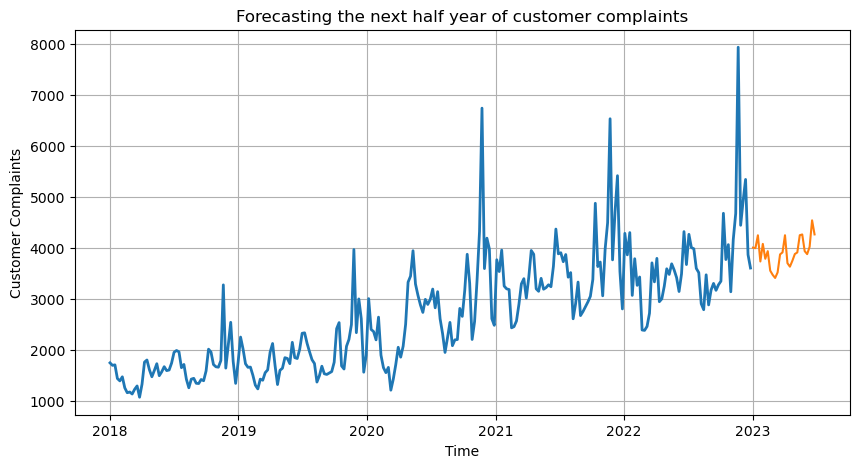

In [40]:
"""
Forecast customer complaints for the next four weeks using the new regressors 
and visualize the forecasted data alongside the historical data.
"""

# Forecast customer complaints for the next 6 months
forecast = model.predict(n_periods=len(X_future), X=X_future)
 
# Customize the Plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['complaints'], linewidth=2)
plt.plot(forecast)
plt.title('Forecasting the next half year of customer complaints')
plt.xlabel('Time')
plt.ylabel('Customer Complaints')
plt.grid(True)
plt.show()
